In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d domhenjes/ballsemtpytt

Dataset URL: https://www.kaggle.com/datasets/domhenjes/ballsemtpytt
License(s): CC-BY-NC-SA-4.0
 95% 184M/195M [00:02<00:00, 64.6MB/s]
100% 195M/195M [00:02<00:00, 69.2MB/s]


In [5]:
from zipfile import ZipFile
zip_read = ZipFile("/content/ballsemtpytt.zip", 'r')
zip_read.extractall()
zip_read.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/ballsemtpytt.zip' mode='r'>>

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 823 files belonging to 2 classes.
Found 80 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [31]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3), kernel_regularizer=keras.regularizers.l2(0.05)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3), kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3), kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.5046 - loss: 1.5064 - val_accuracy: 0.4875 - val_loss: 1.2198
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6176 - loss: 1.1468 - val_accuracy: 0.6125 - val_loss: 0.9810
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.6704 - loss: 0.9282 - val_accuracy: 0.7125 - val_loss: 0.7661
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6817 - loss: 0.7902 - val_accuracy: 0.7125 - val_loss: 0.7281
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7084 - loss: 0.7224 - val_accuracy: 0.6375 - val_loss: 0.7725
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.7006 - loss: 0.7142 - val_accuracy: 0.7250 - val_loss: 0.6759
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7274 - loss: 0.6753 - val_accuracy: 0.8000 - val_loss: 0.5751
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7616 - loss: 0.6105 - val_accuracy: 0.6250

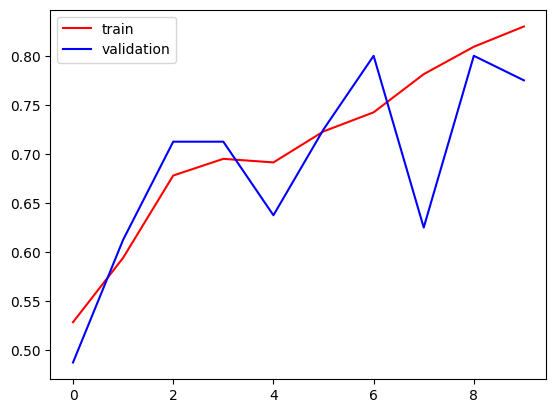

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

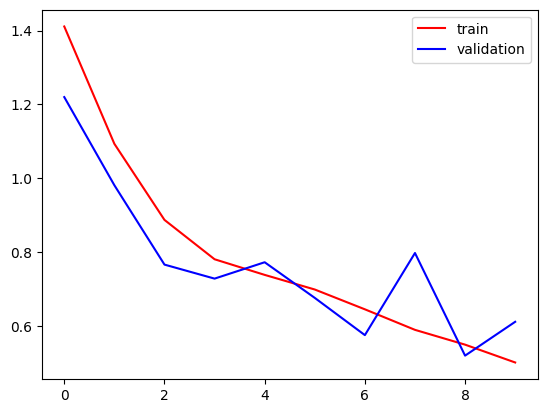

In [35]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [36]:
import cv2

In [63]:
test_img = cv2.imread('/content/ball1.jpg')

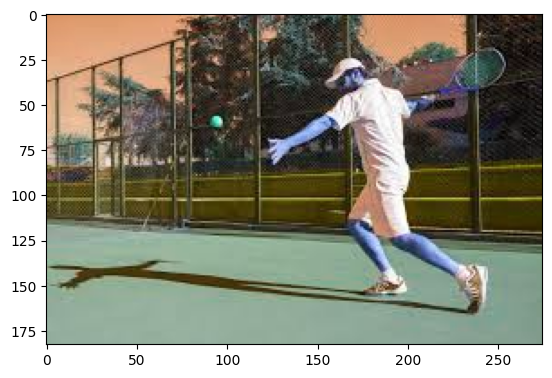

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(183, 275, 3)

In [66]:
test_img = cv2.resize(test_img,(256,256))

In [67]:
test_input = test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)

In [87]:
test_img_2 = cv2.imread('/content/ball0.jpg')

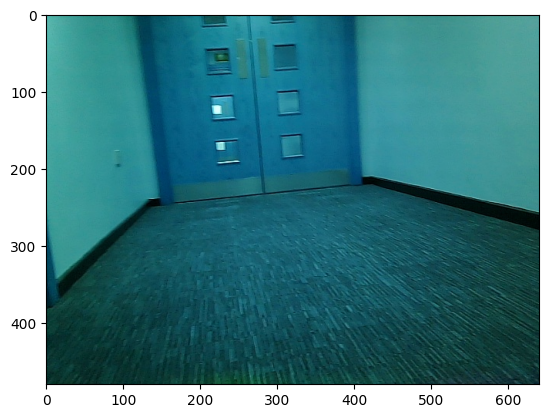

In [88]:
plt.imshow(test_img_2)

In [89]:
test_img_2.shape

(480, 640, 3)

In [90]:
test_img_2 = cv2.resize(test_img,(256,256))

In [91]:
test_input_2 = test_img_2.reshape((1,256,256,3))

In [92]:
model.predict(test_input_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)